# Fraud

E-commerce websites often transact huge amounts of money. And whenever a huge amount of money is moved, there is a high risk of users performing fraudulent activities, e.g. using stolen credit cards or doing money laundry.

Machine Learning really excels at identifying fraudulent activities. Any website where you put your credit card information has a risk team in charge of avoiding frauds via machine learning.

The goal of this challenge is to build a machine learning model that predicts the probability that the first transaction of a new user is fraudulent.


## Challenge Description

Company XYZ is an e-commerce site that sells hand-made clothes.


You have to build a model that predicts whether a user has a high probability of using the site to perform some illegal activity or not. This is a super common task for data scientists.


You only have information about the user first transaction on the site and based on that you have to make your classification (“fraud/no fraud”).

These are the tasks you are asked to do:


- For each user, determine their country based on the IP address


- Build a model to predict whether an activity is fraudulent or not. Explain how different assumptions about the cost of false positives vs false negatives would impact the model


- Your boss is a bit worried about using a model she doesn’t understand for something as important as fraud detection. How would you explain her how the model is making the predictions? Not from a mathematical perspective (she couldn’t care less about that), but from a user perspective. What kinds of users are more likely to be classified as at risk? What are their characteristics?


- Let’s say you now have this model which can be used live to predict in real time if an activity is fraudulent or not. From a product perspective, how would you use it? That is, what kind of different user experiences would you build based on the model output?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fraud_Data.csv')
df.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


- user_id : Id of the user. Unique by user

- signup_time : the time when the user created her account (GMT time)

- purchase_time : the time when the user bought the item (GMT time)

- purchase_value : the cost of the item purchased (USD)

- device_id : the device id. You can assume that it is unique by device. I.e., same device ID means that the same physical device was used for the transaction

- source : user marketing channel: ads, SEO, Direct (i.e. came to the site by directly typing the site address on the browser)

- browser : the browser used by the user

- sex : user sex: Male/Female

- age : user age

- ip_address : user numeric ip address

- class : this is what we are trying to predict: whether the activity was fraudulent (1) or not (0)

In [3]:
df_ip = pd.read_csv('IpAddress_to_Country.csv')
df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [4]:
print(df.shape)
print(df_ip.shape)

(151112, 11)
(138846, 3)


In [5]:
df.ip_address[0]

732758368.79972

In [6]:
import warnings
warnings.filterwarnings("ignore")

countries = []

for i in range(df.shape[0]):
    ip = df.ip_address[i]
    country = df_ip[(ip >= df_ip.lower_bound_ip_address)
         & (ip <= df_ip.upper_bound_ip_address)].country.values
    if (len(country)==1):
        countries.append(country[0])
    else:
        countries.append(np.NaN)
        
    if (i % 10000) == 0:
        print(i,country)

0 ['Japan']
10000 ['Japan']
20000 ['United States']
30000 ['United States']
40000 ['Korea Republic of']
50000 []
60000 ['United States']
70000 ['China']
80000 ['United States']
90000 ['Poland']
100000 ['United States']
110000 ['France']
120000 ['China']
130000 ['Russian Federation']
140000 ['Japan']
150000 ['Kazakhstan']


In [7]:
df['country'] = countries

In [8]:
df.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States
151111,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,20,ZINIADFCLHYPG,Direct,IE,M,38,4.103825e+09,0,NaN


In [9]:
df.purchase_time = pd.to_datetime(df.purchase_time)
df.signup_time = pd.to_datetime(df.signup_time)
df['purchase_signup_diff'] = (df.purchase_time - df.signup_time).dt.seconds

In [10]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_signup_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461


In [11]:
# add device_id_count and ip

df['device_id_count'] = df.groupby('device_id')['device_id'].transform('count')
df['ip_address_count'] = df.groupby('ip_address')['ip_address'].transform('count')
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_signup_diff,device_id_count,ip_address_count
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,60085,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1,1


In [12]:
df_ML = df.drop(['user_id','signup_time','purchase_time','device_id','ip_address'],axis=1)

In [13]:
df_ML.head()

,purchase_value,source,browser,sex,age,class,country,purchase_signup_diff,device_id_count,ip_address_count
0,34,SEO,Chrome,M,39,0,Japan,13882,1,1
1,16,Ads,Chrome,F,53,0,United States,17944,1,1
2,15,SEO,Opera,M,53,1,United States,1,12,12
3,44,SEO,Safari,M,41,0,NaN,60085,1,1
4,39,Ads,Safari,M,45,0,United States,41461,1,1


In [14]:
df_ML.country = df_ML.country.replace(np.nan,"Not_found")

In [15]:
other_countries = list(df_ML.groupby('country').size().sort_values(ascending=False)[51:].index)
df_ML.country = df_ML.country.replace(other_countries,"Others")

In [16]:
pd.set_option('display.max_columns', None) 
df_ML = pd.get_dummies(df_ML)

In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [18]:
y = df_ML['class']
X = df_ML.drop('class',axis=1)

In [19]:
# Split to training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, max_features=3, class_weight='balanced',random_state=20)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _= roc_curve(y_test, y_pred_proba)
print(f1_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
metrics.confusion_matrix(y_test,y_pred)

0.6897347174163784
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27456
           1       0.95      0.54      0.69      2767

    accuracy                           0.96     30223
   macro avg       0.95      0.77      0.83     30223
weighted avg       0.96      0.96      0.95     30223



array([[27383,    73],
       [ 1272,  1495]])

In [21]:
logreg = LogisticRegression(penalty='l2', solver='lbfgs', class_weight='balanced')
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba)

print(f1_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("confusion matrix: \n", metrics.confusion_matrix(y_test,y_pred))

0.6660761736049601
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     27456
           1       0.86      0.54      0.67      2767

    accuracy                           0.95     30223
   macro avg       0.91      0.77      0.82     30223
weighted avg       0.95      0.95      0.94     30223

confusion matrix: 
 [[27211   245]
 [ 1263  1504]]


In [22]:
xgb = XGBClassifier(max_depth=6, learning_rate=0.01, n_estimators=100)

xgb.fit(X_train,y_train)
y_pred =xgb.predict(X_test)
y_pred_proba =xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, _= roc_curve(y_test, y_pred_proba)
print(f1_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
metric_xgb = metrics.confusion_matrix(y_test,y_pred)
print(metric_xgb)

0.6951190756896958
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27456
           1       1.00      0.53      0.70      2767

    accuracy                           0.96     30223
   macro avg       0.98      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223

[[27456     0]
 [ 1293  1474]]


In [23]:
KNN = KNeighborsClassifier(n_neighbors = 5)

KNN.fit(X_train, y_train)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred)
y_pred = KNN.predict(X_test)
y_pred_proba = KNN.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba)


print(classification_report(y_test,y_pred))
metrics.confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27456
           1       0.98      0.53      0.69      2767

    accuracy                           0.96     30223
   macro avg       0.97      0.77      0.83     30223
weighted avg       0.96      0.96      0.95     30223



array([[27426,    30],
       [ 1292,  1475]])

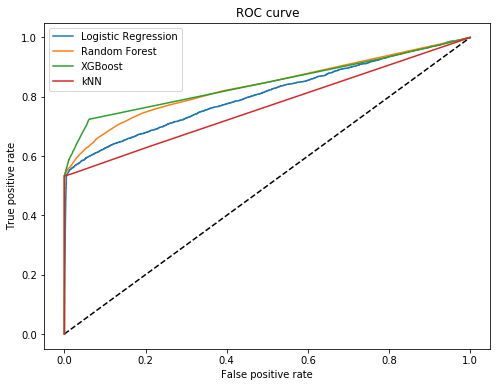

In [24]:
plt.figure(figsize = (8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_knn, tpr_knn, label='kNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

So the best prediction is given by XGBoost, with F1-score is 0.7. 

The last question is very important:

- Let’s say you now have this model which can be used live to predict in real time if an activity is fraudulent or not. From a product perspective, how would you use it? That is, what kind of different user experiences would you build based on the model output?

You now have a model that assigns to each user a probability of committing a fraud. And, despite our model doing pretty well, no model is perfect. So you will have some misclassifications. It is crucial now to think about building a product that minimizes the impact (aka cost) of those misclassifications. A very commonly used approach is to think about creating different experiences based on the model score. For instance:


If predicted fraud probability < X, the user has the normal experience (the high majority of users should fall here)


If X <= predicted fraud probability < Z (so the user is at risk, but not too much), you can create an additional verification step, like phone number verifications via a code sent by SMS or asking to log in via social network accounts


If predicted fraud probability >= Z (so here is really likely the user is trying to commit a fraud), you can tell the user his activity has been put on hold, send this user info to someone who reviews it manually, and finally either block the user or decide it is not a fraud so the session is resumed


This is just an example and there are many different ways to build products around some fraud score. However, it is important because it highlights that a ML model is often really useful when it is combined with a product which is able to take advantage of its strengths and minimize its possible drawbacks (like false positives).